In [2]:
import os
import glob

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

# Hough space

## Hough lines

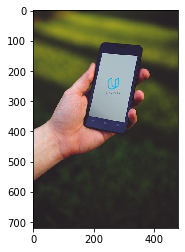

In [7]:
image = cv2.imread('images/phone.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image);

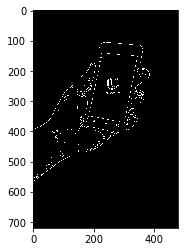

In [8]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# define parameters for Canny
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(gray, low_threshold, high_threshold,apertureSize = 3)

plt.imshow(edges, cmap='gray');

In [42]:
# Canny is a image with only black and white
np.unique(edges)

array([  0, 255], dtype=uint8)

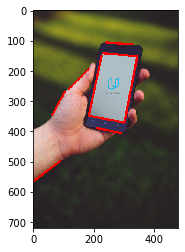

In [44]:
rho = 1
theta = np.pi/180
threshold = 60
min_line_length = 50
max_line_gap = 5

lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
            min_line_length, max_line_gap)

line_image = np.copy(image)

for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)
        
cv2.imwrite('line_image.jpg', cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
        
plt.imshow(line_image);

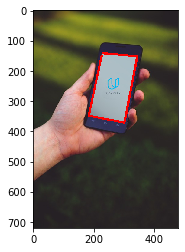

In [51]:
threshold = 60
min_line_length = 100
max_line_gap = 5

lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
            min_line_length, max_line_gap)

line_image = np.copy(image)

for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)
        
cv2.imwrite('line_image.jpg', cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
        
plt.imshow(line_image);

## Hough Circle Detection

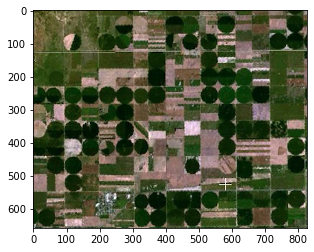

In [53]:
# Read in the image
image = cv2.imread('images/round_farms.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image);

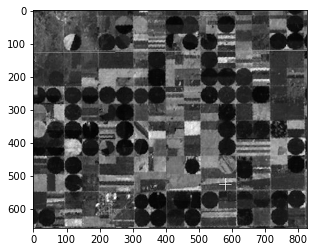

In [54]:
# Gray and blur
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

gray_blur = cv2.GaussianBlur(gray, (3, 3), 0)

plt.imshow(gray_blur, cmap='gray')

`HoughCircles` takes in a few things as its arguments:
* an input image, detection method (Hough gradient), resolution factor between the detection and image (1),
* minDist - the minimum distance between circles
* param1 - the higher value for performing Canny edge detection
* param2 - threshold for circle detection, a smaller value --> more circles will be detected
* min/max radius for detected circles

The variable you should change will be the last two: min/max radius for detected circles. Take a look at the image above and estimate how many pixels the average circle is in diameter; use this estimate to provide values for min/max arguments. You may also want to see what happens if you change minDist.

uint16


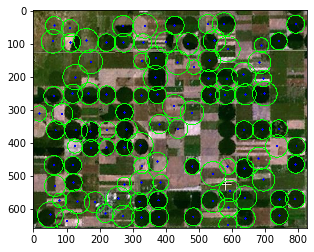

In [78]:
circles_im = np.copy(image)

circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, 1,
                           minDist=45,
                           param1=70,
                           param2=17,
                           minRadius=20,
                           maxRadius=40)

# convert circles into expected type
circles = np.around(circles) # round circles values
circles = circles.astype(np.uint16) #change float to int16, not int8
print(circles.dtype)

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(circles_im,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(circles_im,(i[0],i[1]),2,(0,0,255),3)
    
plt.imshow(circles_im)

# Haar Cascade

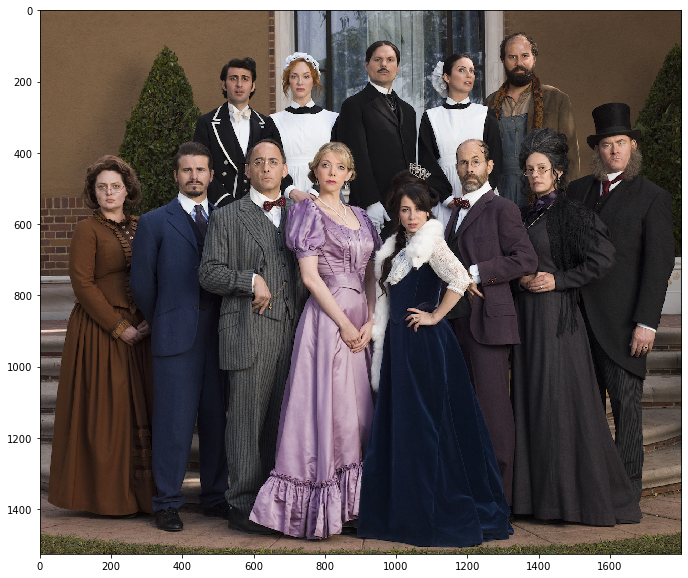

In [7]:
image = cv2.imread('images/multi_faces.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 10))
plt.imshow(image)

To use a face detector, we'll first convert the image from color to grayscale.  For face detection this is perfectly fine to do as there is plenty non-color specific structure in the human face for our detector to learn on.

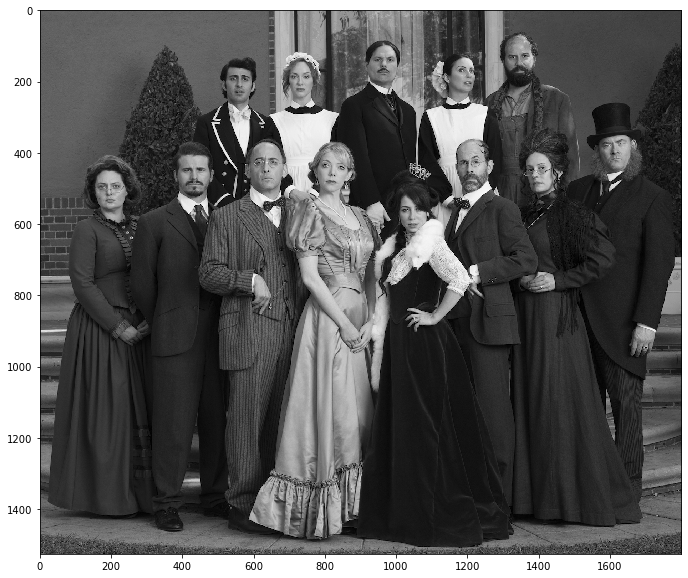

In [9]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(20, 10))
plt.imshow(gray, cmap='gray');

Next we load in the fully trained architecture of the face detector, found in the file `detector_architectures/ haarcascade_frontalface_default.xml`,and use it on our image to find faces!

**A note on parameters** 

How many faces are detected is determined by the function, `detectMultiScale` which aims to detect faces of varying sizes. The inputs to this function are: `(image, scaleFactor, minNeighbors)`; you will often detect more faces with a smaller scaleFactor, and lower value for minNeighbors, but raising these values often produces better matches. Modify these values depending on your input image.

In [10]:
# load cascade detector
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# run cascade detector
faces = face_cascade.detectMultiScale(gray, 4, 6)


In [26]:
type(faces)

numpy.ndarray

The output of the classifier is an array of detections; coordinates that define the dimensions of a bounding box around each face. Note that this always outputs a bounding box that is square in dimension.

In [15]:
# print out the detections found
print ('We found ' + str(len(faces)) + ' faces in this image')
print ("Their coordinates and lengths/widths are as follows")
print ('=============================')
print (faces)

We found 13 faces in this image
Their coordinates and lengths/widths are as follows
[[ 588  390   96   96]
 [1157  390   96   96]
 [ 773  404   96   96]
 [ 383  413   96   96]
 [1344  411   96   96]
 [1565  339   96   96]
 [1295   94   96   96]
 [ 917  103   96   96]
 [ 147  459   96   96]
 [1146  132   96   96]
 [ 684  150   96   96]
 [ 510  156   96   96]
 [ 996  526   96   96]]


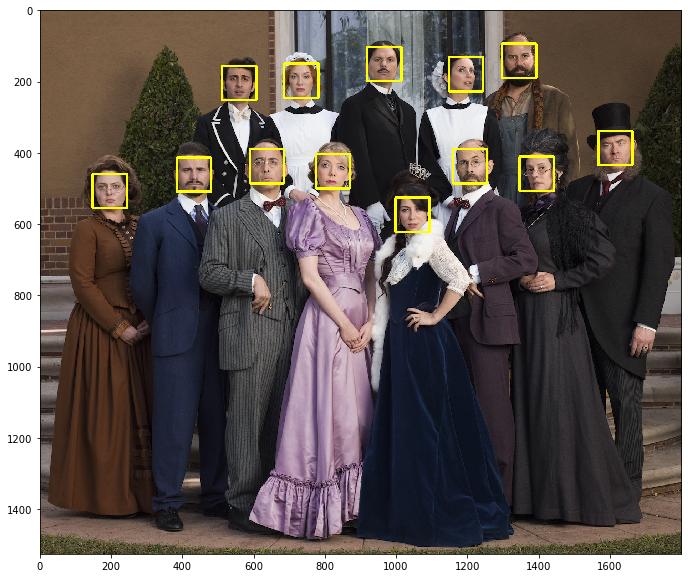

In [25]:
img_faces = np.copy(image)

for (x,y,w,h) in faces:
    
    cv2.rectangle(img_faces, (x,y), (x+w, y+h), (255, 255, 0), 5)

    
cv2.imwrite('images/img_faces.jpg', cv2.cvtColor(img_faces, cv2.COLOR_BGR2RGB))

plt.figure(figsize=(20, 10))
plt.imshow(img_faces);